In [1]:
import findspark

In [2]:
findspark.init('spark-3.0.1-bin-hadoop2.7')

In [3]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [4]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

22/01/09 12:09:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [6]:
socket_stream = ssc.socketTextStream("127.0.0.1", 9999)

In [7]:
lines = socket_stream.window( 20 )

In [8]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [9]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

# Run the TweetRead.py file at this point

In [10]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline 


In [11]:
ssc.start()

22/01/09 12:10:42 ERROR JobScheduler: Error running job streaming job 1641710440000 ms.0
org.apache.spark.SparkException: An exception was raised by Python:
Traceback (most recent call last):
  File "/Users/amitk/Documents/study_materials/web-scraping-ppt/spark-3.0.1-bin-hadoop2.7/python/pyspark/streaming/util.py", line 68, in call
    r = self.func(t, *rdds)
  File "/Users/amitk/Documents/study_materials/web-scraping-ppt/spark-3.0.1-bin-hadoop2.7/python/pyspark/streaming/dstream.py", line 161, in <lambda>
    func = lambda t, rdd: old_func(rdd)
  File "/var/folders/52/tdgmcxmd6ps8hpq8v4k0nzhm0000gp/T/ipykernel_92304/1757346720.py", line 7, in <lambda>
    .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  File "/Users/amitk/Documents/study_materials/web-scraping-ppt/spark-3.0.1-bin-hadoop2.7/python/pyspark/sql/session.py", line 61, in toDF
    return sparkSession.createDataFrame(self, schema, sampleRatio)
  File "/Users/amitk/Documents/study_materials/web

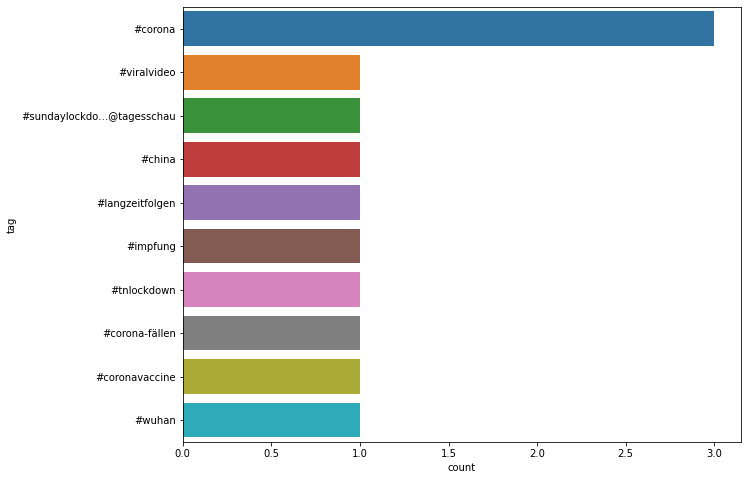

22/01/09 12:11:37 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:11:37 WARN BlockManager: Block input-0-1641710497000 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:11:39 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:11:39 WARN BlockManager: Block input-0-1641710499600 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:11:48 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:11:48 WARN BlockManager: Block input-0-1641710508200 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:11:51 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:11:51 WARN BlockManager: Block input-0-1641710511400 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:11:55 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:11:55 WARN BlockManager: Block input-0-1641710515400 replicated to

22/01/09 12:13:10 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:13:10 WARN BlockManager: Block input-0-1641710590600 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:13:23 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:13:23 WARN BlockManager: Block input-0-1641710603600 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:13:32 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:13:32 WARN BlockManager: Block input-0-1641710611800 replicated to only 0 peer(s) instead of 1 peers
22/01/09 12:13:35 WARN RandomBlockReplicationPolicy: Expecting 1 replicas with only 0 peer/s.
22/01/09 12:13:35 WARN BlockManager: Block input-0-1641710614800 replicated to only 0 peer(s) instead of 1 peers


In [13]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [14]:
ssc.stop()

22/01/09 12:13:50 WARN SocketReceiver: Error receiving data
java.net.SocketException: Socket closed
	at java.net.SocketInputStream.socketRead0(Native Method)
	at java.net.SocketInputStream.read(SocketInputStream.java:150)
	at java.net.SocketInputStream.read(SocketInputStream.java:121)
	at sun.nio.cs.StreamDecoder.readBytes(StreamDecoder.java:284)
	at sun.nio.cs.StreamDecoder.implRead(StreamDecoder.java:326)
	at sun.nio.cs.StreamDecoder.read(StreamDecoder.java:178)
	at java.io.InputStreamReader.read(InputStreamReader.java:184)
	at java.io.BufferedReader.fill(BufferedReader.java:161)
	at java.io.BufferedReader.readLine(BufferedReader.java:324)
	at java.io.BufferedReader.readLine(BufferedReader.java:389)
	at org.apache.spark.streaming.dstream.SocketReceiver$$anon$2.getNext(SocketInputDStream.scala:121)
	at org.apache.spark.streaming.dstream.SocketReceiver$$anon$2.getNext(SocketInputDStream.scala:119)
	at org.apache.spark.util.NextIterator.hasNext(NextIterator.scala:73)
	at org.apache.spar